In [116]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob
import pickle

In [146]:
runs = glob.glob("runs/evolution_*")+glob.glob("runs/cee_*")

In [147]:
runs

['runs/evolution_cee_shapes_features_pop_size_16_cull_interval_5000_cull_rate_0.125_e64_h64_len5_voc5',
 'runs/cee_shapes_features_pop_size_16_cull_interval_5000_cull_rate_0.125_e64_h64_len5_voc5_cull_mode_random',
 'runs/cee_shapes_features_pop_size_16_cull_interval_5000_cull_rate_0.125_e64_h64_len5_voc5_cull_mode_best',
 'runs/cee_shapes_features_pop_size_16_cull_interval_5000_cull_rate_0.125_e64_h64_len5_voc5_cull_mode_age']

In [148]:
results = {}
for r in runs:
    results[r] = {}
    seeds = glob.glob("{}/*".format(r))
    for seed in seeds:
        s = int(seed.split('/')[-1])
        results[r][s] = {}
        saved_metrics = glob.glob("{}/metrics*.p".format(seed))
        for m in saved_metrics:
            iteration = int(m.split("_")[-1].split(".")[0])
            p=pickle.load(open(m, 'rb'))
            results[r][s][iteration] = p

In [173]:
def get_run_name(run):
    if "evolution" in run:
        return "evolution"
    else:
        return "cee_"+run.split("_")[-1]


def plot_metric(results, metric="avg_convergence"):
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    
    name = []
    iterations = []
    values = []
    for r in runs:
        run_name = get_run_name(r)
        for s in list(results[r].keys()):    
            for iteration_number in sorted(list(results[r][s].keys())):
                if iteration_number == 0:
                    continue
                iterations.append(iteration_number)
                values.append(results[r][s][iteration_number][metric])
                name.append(run_name)
            

    values = np.array(values)
    iterations = np.array(iterations)    
    iterations = np.concatenate((iterations, iterations), axis=0)
    name += name
    values = np.concatenate((values, values+np.random.normal(0, 0.001, len(values))), axis=0)
    
    d = {'Number of Iterations': iterations, metric: values, 'type': name}
    sns.lineplot(ax=ax, x='Number of Iterations', y=metric, data=pd.DataFrame(data=d), style="type", hue="type")

In [178]:
list(results[runs[0]][42][5000].keys())

['loss',
 'acc',
 'entropy',
 'l_entropy',
 'rsa_sr',
 'rsa_si',
 'rsa_ri',
 'rsa_sm',
 'pseudo_tre',
 'topological_similarity',
 'num_unique_messages',
 'kl_divergence',
 'jaccard_similarity',
 'avg_message_dist',
 'avg_matches',
 'avg_age',
 'avg_convergence',
 'avg_convergence_at_10',
 'avg_convergence_at_100']

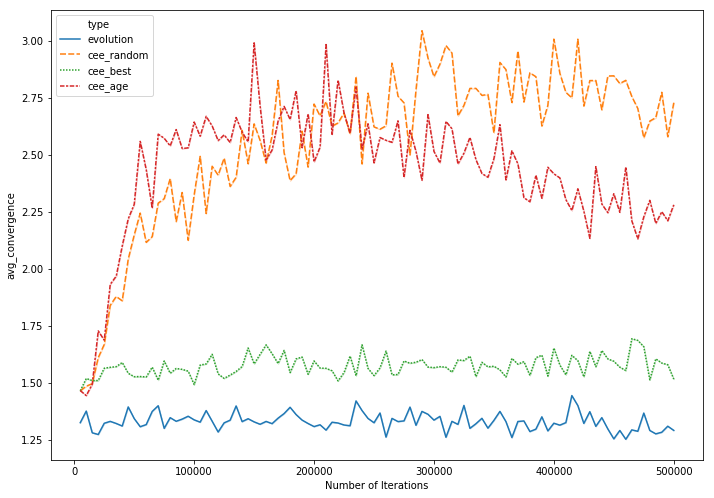

In [174]:
plot_metric(results, metric="avg_convergence")

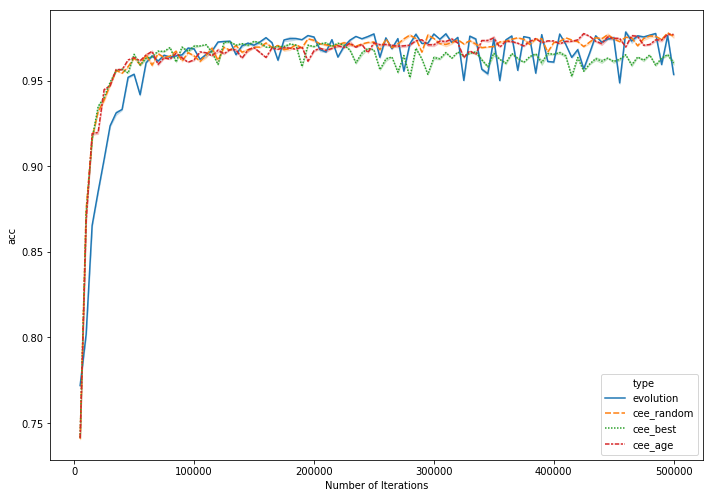

In [175]:
plot_metric(results, metric="acc")

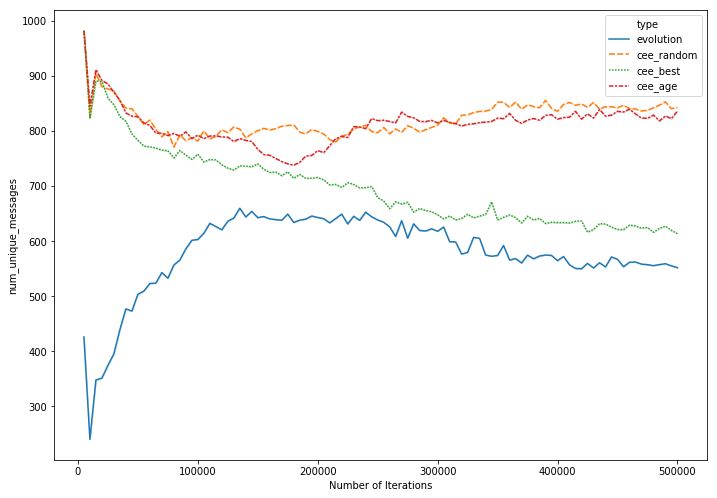

In [176]:
plot_metric(results, metric="num_unique_messages")

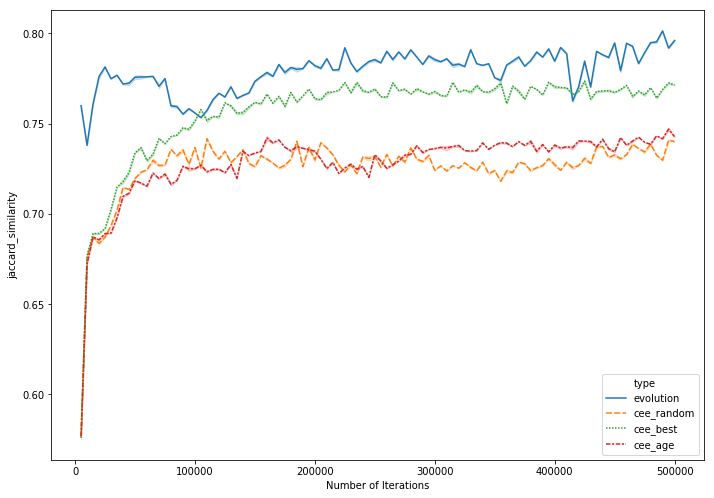

In [179]:
plot_metric(results, metric="jaccard_similarity")

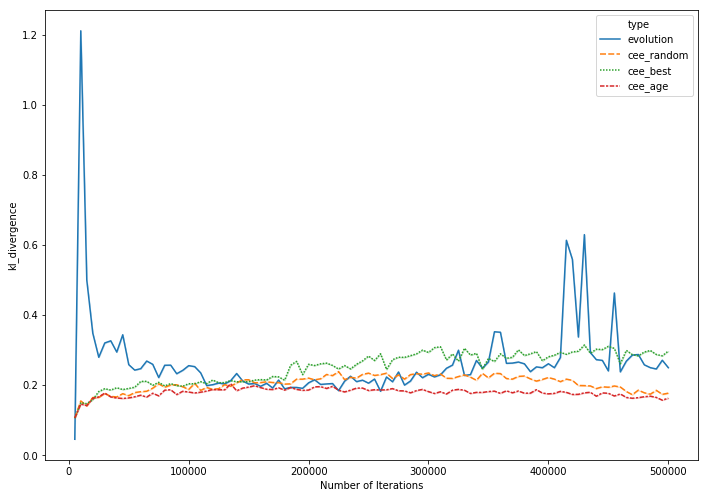

In [180]:
plot_metric(results, metric="kl_divergence")

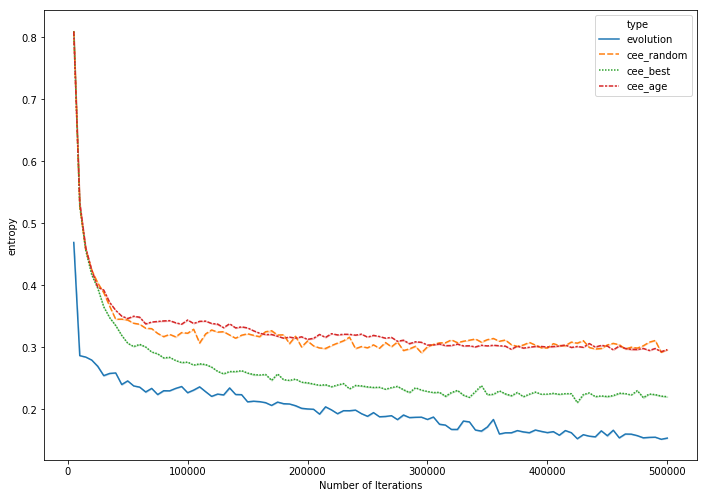

In [181]:
plot_metric(results, metric="entropy")